### Sebastián Rodríguez
### Carnet: 20003076


#                                             Proyecto Final: Titanic


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as mt
from sklearn.externals import joblib
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
Data_Titanic = pd.read_csv("data_titanic_proyecto.csv")
Data_Titanic.head(3)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y


In [3]:
Data_Titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Data_Titanic.describe()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
Data_Titanic["Embarked"].value_counts()

Lower     491
Upper     216
Middle    184
Name: passenger_class, dtype: int64

In [6]:
Data_Titanic["Age"] = Data_Titanic["Age"].fillna(Data_Titanic["Age"].median());
Data_Titanic["Age"].isnull().sum()

Data_Titanic["Female"] = (Data_Titanic["passenger_sex"] == 'F').astype(np.float)

Data_Titanic["Embarked"] = Data_Titanic["Embarked"].fillna('X')
Data_Titanic["Embarked_S"] = (Data_Titanic["Embarked"] == 'S').astype(np.float32)
Data_Titanic["Embarked_C"] = (Data_Titanic["Embarked"] == 'C').astype(np.float32)
Data_Titanic["Embarked_Q"] = (Data_Titanic["Embarked"] == 'Q').astype(np.float32)

Data_Titanic["Class_Lower"] = (Data_Titanic["passenger_class"] == 'Lower').astype(np.float32)
Data_Titanic["Class_Middle"] = (Data_Titanic["passenger_class"] == 'Middle').astype(np.float32)
Data_Titanic["Class_Upper"] = (Data_Titanic["passenger_class"] == 'Upper').astype(np.float32)

Data_Titanic["Survived"] = (Data_Titanic["passenger_survived"].values == 'Y').astype(np.float32)
Data_Titanic.head(3)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper,Survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
Campos = ["Age", "SibSp", "Parch", "Fare", "Female", 
             "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]

y = Data_Titanic["Survived"].values
X = Data_Titanic[Campos].values

X.shape, y.shape

((891, 11), (891,))

In [8]:
Data_Titanic[Campos].head(20)

,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,26.0,0,0,7.9250,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,35.0,1,0,53.1000,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,28.0,0,0,8.4583,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2.0,3,1,21.0750,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,27.0,0,2,11.1333,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9,14.0,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
Campos_Data = ["Age", "SibSp", "Parch", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]

Data_Titanic[Campos_Data].to_csv('TitanicProcessed.csv')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size = 0.4, shuffle = True,random_state = 314)
X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, X_test.shape

((427, 11), (107, 11), (357, 11))

In [12]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
X_train.shape

(427, 11)

In [14]:
SVM_M = Pipeline([("scaler", StandardScaler()),("svc", SVC(C = 10., kernel='rbf', gamma = 0.01, tol = 0.001, max_iter = 5000))])
SVM_M.fit(X_train, y_train.reshape(len(y_train), ));
SVM_M.score(X_train, y_train), SVM_M.score(X_val, y_val)

(0.819672131147541, 0.8130841121495327)

In [15]:
y_pred = SVM_M.predict(X_val)
(mt.accuracy_score(y_val, y_pred, normalize=True), mt.f1_score(y_val, y_pred), mt.precision_score(y_val, y_pred), mt.recall_score(y_val, y_pred, average='weighted'))

(0.8130841121495327,
 0.7435897435897436,
 0.8055555555555556,
 0.8130841121495327)

In [16]:
def entrenaMet_Lis_New(X, y, C_param): 
    SVM_M = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(C = C_param, kernel='rbf', tol = 0.001, max_iter = 5000))])
    SVM_M.fit(X, y.reshape(len(y), ))
    return SVM_M

def Metricas_Acq(modelo, X_train, y_train, X_val, y_val):
    y_pred = modelo.predict(X_train)
    Metrica_Ent = [mt.accuracy_score(y_train, y_pred, normalize=True), 
                    mt.f1_score(y_train, y_pred), 
                    mt.precision_score(y_train, y_pred), 
                    mt.recall_score(y_train, y_pred, average='weighted')]
    y_pred = modelo.predict(X_val)
    Metricas = [mt.accuracy_score(y_val, y_pred, normalize=True), 
                    mt.f1_score(y_val, y_pred), 
                    mt.precision_score(y_val, y_pred), 
                    mt.recall_score(y_val, y_pred, average='weighted')]
    
    return Metrica_Ent, Metricas

In [17]:
ParametroC = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
Met_Lis_New = []
Met_List = []
for c in ParametroC:
    svm = entrenaMet_Lis_New(X_train, y_train, C_param = c)
    Metrica_Ent, valMetrics = Metricas_Acq(svm, X_train, y_train, X_val, y_val)
    Met_Lis_New.append(Metrica_Ent.copy())
    Met_List.append(valMetrics.copy())

In [18]:
SVM_Res = pd.DataFrame(np.column_stack((ParametroC, np.array(Met_Lis_New), np.array(Met_List))), 
                             columns = ['C', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
SVM_Res

,C,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.796253,0.658824,0.875000,0.796253,0.803738,0.686567,0.920000,0.803738
1,0.5,0.829040,0.745645,0.835938,0.829040,0.813084,0.729730,0.843750,0.813084
2,1.0,0.838407,0.762887,0.840909,0.838407,0.831776,0.756757,0.875000,0.831776
3,2.0,0.840749,0.767123,0.842105,0.840749,0.813084,0.736842,0.823529,0.813084
4,3.0,0.845433,0.767606,0.872000,0.845433,0.803738,0.720000,0.818182,0.803738
5,4.0,0.850117,0.776224,0.874016,0.850117,0.785047,0.701299,0.771429,0.785047
6,5.0,0.854801,0.786207,0.870229,0.854801,0.794393,0.717949,0.777778,0.794393
7,6.0,0.852459,0.783505,0.863636,0.852459,0.766355,0.666667,0.757576,0.766355
8,7.0,0.861827,0.795848,0.884615,0.861827,0.747664,0.649351,0.714286,0.747664
9,8.0,0.859485,0.791667,0.883721,0.859485,0.757009,0.657895,0.735294,0.757009


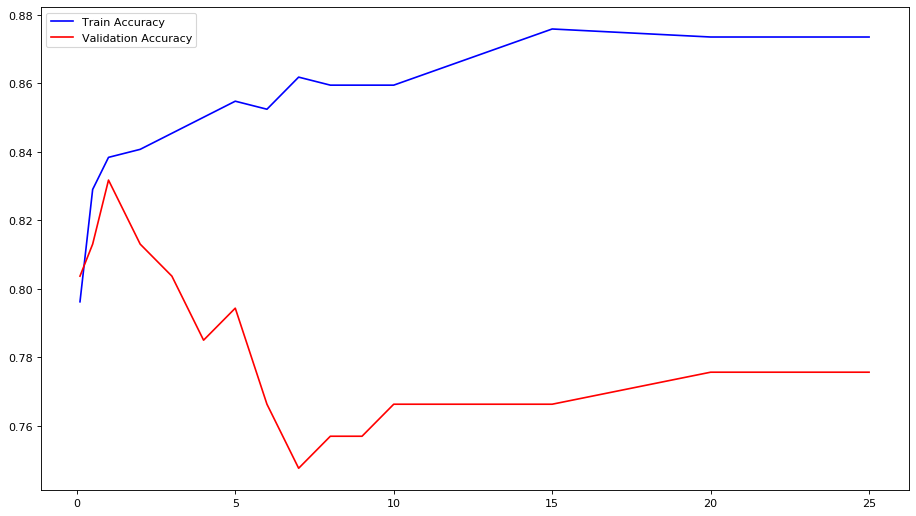

In [19]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(SVM_Res.C, SVM_Res.AccuracyTrain, 'b-', 
         SVM_Res.C, SVM_Res.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));


In [20]:
SVM_final = entrenaMet_Lis_New(X_train, y_train, C_param = 9)

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'svc__C' : [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.], 
              'svc__gamma' : [0.1, 0.5, 1., 2., 3., 5., 7.5, 10., 15., 20., 25.]}

svc = SVC(gamma="scale")
SVM_M = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel = 'rbf', tol = 0.001, max_iter = 5000))])

new_pamcf = GridSearchCV(SVM_M, parameters, cv=5, iid=False, verbose=True, n_jobs=4)
new_pamcf.fit(X_train_cv, y_train_cv) 


Fitting 5 folds for each of 165 candidates, totalling 825 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 298 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 825 out of 825 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=5000,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
              

In [22]:
new_pamcf.best_params_

{'svc__C': 0.5, 'svc__gamma': 0.1}

In [23]:
SVM_M = Pipeline([("scaler", StandardScaler()),("svc", SVC(C = 3.0, gamma = 0.1, kernel='rbf', tol = 0.001, max_iter = 5000))])
SVM_M.fit(X_train_cv, y_train_cv.reshape(len(y_train_cv), ))
Metricas_Acq(SVM_M, X_train, y_train, X_val, y_val)

([0.8407494145199064,
  0.7671232876712328,
  0.8421052631578947,
  0.8407494145199064],
 [0.8411214953271028,
  0.7733333333333333,
  0.8787878787878788,
  0.8411214953271028])

In [24]:
import tensorflow as tf

In [25]:


def entrenar_reg_logistica(Xtrain, Ytrain, lr, lambda_val, epochs):
    import time
    m, k = Xtrain.shape
    
    tf.reset_default_graph()
    g = tf.Graph()
    with g.as_default():
        X = tf.placeholder(tf.float32, shape = (None, k), name = "X")
        Ylabels = tf.placeholder(tf.float32, name = "Ylabels")
        lr_param = tf.placeholder(tf.float32, name = "lr")
        lambda_param = tf.placeholder(tf.float32, name = "lambda")
        
        W = tf.Variable(tf.truncated_normal(shape = [k, 1]), name = "W")
        b = tf.Variable(tf.truncated_normal(shape = (1, 1)), name = "b")
        
        with tf.name_scope("Logits"):
            Logits = tf.add(tf.matmul(X, W), b, name = "Logits")
            YlabelsHat = tf.nn.sigmoid(Logits)

        with tf.name_scope("FuncionCosto"):
            w_norm = tf.divide(tf.multiply(tf.multiply(tf.constant(0.5), lambda_param), 
                                 tf.reduce_sum(tf.square(W))), tf.cast(m, tf.float32), name = "W_norm")

            classif_term = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                labels = Ylabels, logits = Logits), name = "CostoClasif") 

            cost = tf.add(classif_term, w_norm, name="Costo")

        with tf.name_scope("GradientDes.Optimizer"):
            optimizer = tf.train.GradientDescentOptimizer(lr_param).minimize(cost) 
 
        init = tf.global_variables_initializer() 

    start = time.time()
    with tf.Session(graph = g) as sess: 

        sess.run(init)
        for epoch in range(epochs):
            _, c_ = sess.run([optimizer, cost], 
                             feed_dict = {X : Xtrain, Ylabels : Ytrain.reshape((m, 1)), 
                                          lr_param : lr, lambda_param : lambda_val})
            if (epoch + 1) % round(epochs*0.1) == 0:
                print("Epoch: %d, \t costo = %0.4f" % (epoch+1, c_))
        w_, b_ = sess.run([W, b])
        
    end = time.time()
    print("Tiempo transcurrido: %0.2f segundos" % (end-start))
    return w_, b_

In [26]:
w_, b_ = entrenar_reg_logistica(X_train, y_train, lr = 0.001, epochs = 1000, lambda_val = 8.)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 100, 	 costo = 1.5291
Epoch: 200, 	 costo = 0.8061
Epoch: 300, 	 costo = 0.8023
Epoch: 400, 	 costo = 0.7986
Epoch: 500, 	 costo = 0.7950
Epoch: 600, 	 costo = 0.7914
Epoch: 700, 	 costo = 0.7878
Epoch: 800, 	 costo = 0.7843
Epoch: 900, 	 costo = 0.7809
Epoch: 1000, 	 costo = 0.7774
Tiempo transcurrido: 0.94 segundos


In [27]:
def Logistic_Pred(x, weights, b):
    def sigmoid(x):
        return (1 / (1 + np.exp(-x)))
    l = np.matmul(x, weights) + b
    y_hat = 1.0*(sigmoid(l) > 0.5)
    return y_hat

In [28]:
(mt.accuracy_score(y_train, Logistic_Pred(X_train, w_, b_)), 
mt.accuracy_score(y_val, Logistic_Pred(X_val, w_, b_)) )

(0.6487119437939111, 0.6822429906542056)

In [29]:

def Metric_Logit(w, b, X_train, y_train, X_val, y_val):
    y_pred = Logistic_Pred(X_train, w, b)
    Metrica_Ent = [mt.accuracy_score(y_train, y_pred, normalize=True), 
                    mt.f1_score(y_train, y_pred), 
                    mt.precision_score(y_train, y_pred), 
                    mt.recall_score(y_train, y_pred, average='weighted')]

    y_pred = Logistic_Pred(X_val, w, b)
    Metricas = [mt.accuracy_score(y_val, y_pred, normalize=True), 
                    mt.f1_score(y_val, y_pred), 
                    mt.precision_score(y_val, y_pred), 
                    mt.recall_score(y_val, y_pred, average='weighted')]
    
    return Metrica_Ent, Metricas



In [30]:
Data_Titanic[Campos].head(2)

,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
lambda_param_list = [0.25, 0.8, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
Met_Lis_New = []
Met_List = []
for lam in lambda_param_list:
    w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                    lr = 0.001, epochs = 1000, 
                                    lambda_val = lam)
    Metrica_Ent, valMetrics = Metric_Logit(w_, b_, 
                                             X_train[:, varFilter], y_train, 
                                             X_val[:, varFilter], y_val)
    Met_Lis_New.append(Metrica_Ent.copy())
    Met_List.append(valMetrics.copy())


Epoch: 100, 	 costo = 0.8563
Epoch: 200, 	 costo = 0.8524
Epoch: 300, 	 costo = 0.8485
Epoch: 400, 	 costo = 0.8446
Epoch: 500, 	 costo = 0.8407
Epoch: 600, 	 costo = 0.8369
Epoch: 700, 	 costo = 0.8331
Epoch: 800, 	 costo = 0.8294
Epoch: 900, 	 costo = 0.8256
Epoch: 1000, 	 costo = 0.8219
Tiempo transcurrido: 0.63 segundos
Epoch: 100, 	 costo = 0.6048
Epoch: 200, 	 costo = 0.6032
Epoch: 300, 	 costo = 0.6017
Epoch: 400, 	 costo = 0.6003
Epoch: 500, 	 costo = 0.5988
Epoch: 600, 	 costo = 0.5974
Epoch: 700, 	 costo = 0.5959
Epoch: 800, 	 costo = 0.5945
Epoch: 900, 	 costo = 0.5931
Epoch: 1000, 	 costo = 0.5917
Tiempo transcurrido: 0.63 segundos
Epoch: 100, 	 costo = 0.7801
Epoch: 200, 	 costo = 0.7766
Epoch: 300, 	 costo = 0.7730
Epoch: 400, 	 costo = 0.7695
Epoch: 500, 	 costo = 0.7661
Epoch: 600, 	 costo = 0.7627
Epoch: 700, 	 costo = 0.7593
Epoch: 800, 	 costo = 0.7559
Epoch: 900, 	 costo = 0.7526
Epoch: 1000, 	 costo = 0.7493
Tiempo transcurrido: 0.64 segundos
Epoch: 100, 	 costo = 

In [32]:
Log_Reg = pd.DataFrame(np.column_stack((lambda_param_list, np.array(Met_Lis_New), np.array(Met_List))), 
                             columns = ['Lambda', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
Log_Reg

,Lambda,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.625293,0.327731,0.493671,0.625293,0.635514,0.315789,0.600000,0.635514
1,0.5,0.688525,0.494297,0.625000,0.688525,0.644860,0.457143,0.571429,0.644860
2,1.0,0.641686,0.348936,0.539474,0.641686,0.607477,0.250000,0.500000,0.607477
3,2.0,0.632319,0.456747,0.507692,0.632319,0.616822,0.467532,0.514286,0.616822
4,3.0,0.569087,0.308271,0.383178,0.569087,0.570093,0.258065,0.400000,0.570093
5,4.0,0.733021,0.622517,0.657343,0.733021,0.682243,0.585366,0.600000,0.682243
6,5.0,0.611241,0.450331,0.475524,0.611241,0.579439,0.457831,0.463415,0.579439
7,6.0,0.770492,0.675497,0.713287,0.770492,0.766355,0.675325,0.742857,0.766355
8,7.0,0.618267,0.415771,0.483333,0.618267,0.542056,0.363636,0.400000,0.542056
9,8.0,0.758782,0.660066,0.694444,0.758782,0.766355,0.683544,0.729730,0.766355


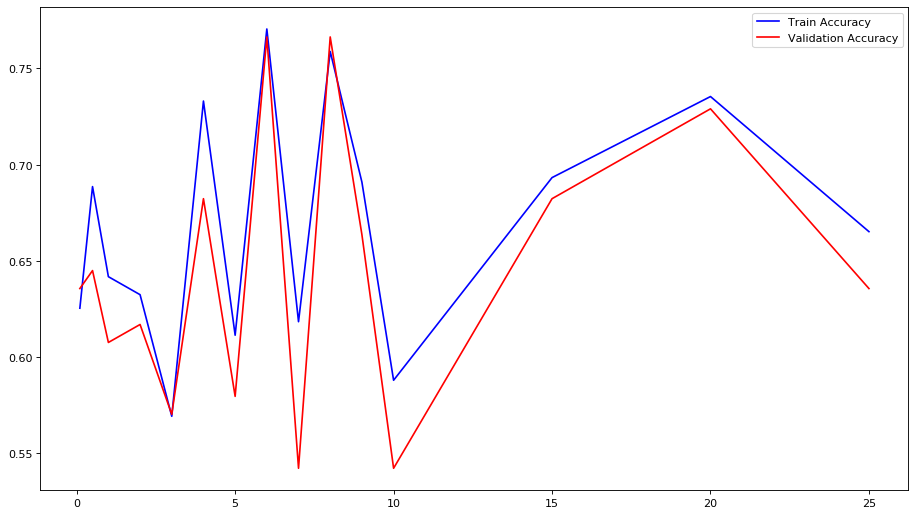

In [33]:

fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Log_Reg.Lambda, Log_Reg.AccuracyTrain, 'b-', 
         Log_Reg.Lambda, Log_Reg.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));



In [34]:
lambda_param_list = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
Met_Lis_New = []
Met_List = []
for lam in lambda_param_list:
    w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                    lr = 0.001, epochs = 1000, 
                                    lambda_val = lam)

    Metrica_Ent, valMetrics = Metric_Logit(w_, b_, 
                                             X_train[:, varFilter], y_train, 
                                             X_val[:, varFilter], y_val)
    Met_Lis_New.append(Metrica_Ent.copy())
    Met_List.append(valMetrics.copy())

Epoch: 100, 	 costo = 0.7394
Epoch: 200, 	 costo = 0.7361
Epoch: 300, 	 costo = 0.7329
Epoch: 400, 	 costo = 0.7298
Epoch: 500, 	 costo = 0.7267
Epoch: 600, 	 costo = 0.7236
Epoch: 700, 	 costo = 0.7205
Epoch: 800, 	 costo = 0.7175
Epoch: 900, 	 costo = 0.7145
Epoch: 1000, 	 costo = 0.7116
Tiempo transcurrido: 0.60 segundos
Epoch: 100, 	 costo = 0.8490
Epoch: 200, 	 costo = 0.7046
Epoch: 300, 	 costo = 0.7028
Epoch: 400, 	 costo = 0.7009
Epoch: 500, 	 costo = 0.6991
Epoch: 600, 	 costo = 0.6973
Epoch: 700, 	 costo = 0.6955
Epoch: 800, 	 costo = 0.6937
Epoch: 900, 	 costo = 0.6919
Epoch: 1000, 	 costo = 0.6902
Tiempo transcurrido: 0.62 segundos
Epoch: 100, 	 costo = 7.5803
Epoch: 200, 	 costo = 0.9134
Epoch: 300, 	 costo = 0.9089
Epoch: 400, 	 costo = 0.9044
Epoch: 500, 	 costo = 0.8999
Epoch: 600, 	 costo = 0.8955
Epoch: 700, 	 costo = 0.8911
Epoch: 800, 	 costo = 0.8867
Epoch: 900, 	 costo = 0.8824
Epoch: 1000, 	 costo = 0.8781
Tiempo transcurrido: 0.62 segundos
Epoch: 100, 	 costo = 

In [35]:
Log_Reg = pd.DataFrame(np.column_stack((lambda_param_list, np.array(Met_Lis_New), np.array(Met_List))), 
                             columns = ['Lambda', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
Log_Reg

,Lambda,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.627635,0.488746,0.500000,0.627635,0.551402,0.384615,0.416667,0.551402
1,0.5,0.618267,0.398524,0.482143,0.618267,0.626168,0.411765,0.538462,0.626168
2,1.0,0.442623,0.278788,0.269006,0.442623,0.373832,0.211765,0.209302,0.373832
3,2.0,0.702576,0.481633,0.686047,0.702576,0.672897,0.492754,0.629630,0.672897
4,3.0,0.660422,0.464945,0.562500,0.660422,0.691589,0.507463,0.680000,0.691589
5,4.0,0.644028,0.392000,0.538462,0.644028,0.635514,0.338983,0.588235,0.635514
6,5.0,0.679157,0.505415,0.593220,0.679157,0.691589,0.571429,0.628571,0.691589
7,6.0,0.651054,0.424710,0.550000,0.651054,0.579439,0.383562,0.451613,0.579439
8,7.0,0.550351,0.232000,0.318681,0.550351,0.495327,0.228571,0.285714,0.495327
9,8.0,0.627635,0.239234,0.500000,0.627635,0.579439,0.181818,0.384615,0.579439


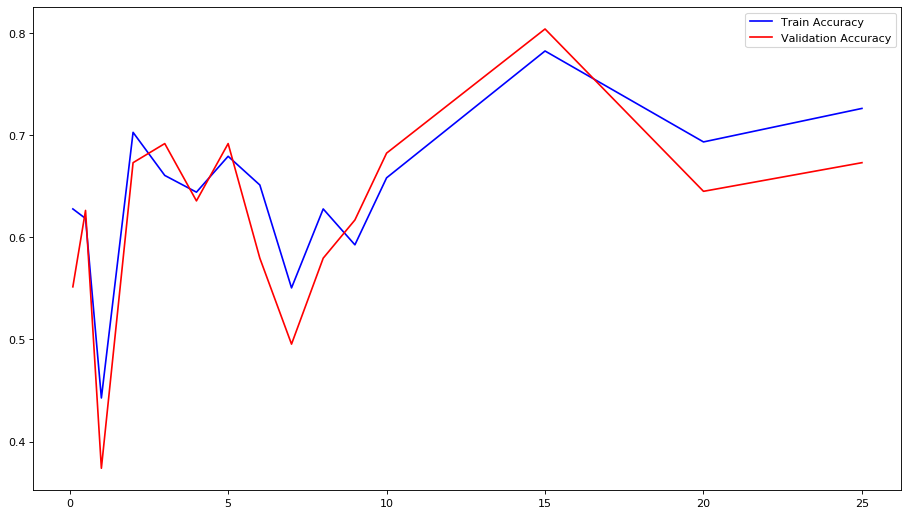

In [36]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Log_Reg.Lambda, Log_Reg.AccuracyTrain, 'b-', 
         Log_Reg.Lambda, Log_Reg.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [37]:
w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                lr = 0.001, epochs = 3000, lambda_val = 6)
(mt.accuracy_score(y_train, Logistic_Pred(X_train[:, varFilter], w_, b_)), 
mt.accuracy_score(y_val, Logistic_Pred(X_val[:, varFilter], w_, b_)) )

Epoch: 300, 	 costo = 0.5714
Epoch: 600, 	 costo = 0.5681
Epoch: 900, 	 costo = 0.5650
Epoch: 1200, 	 costo = 0.5621
Epoch: 1500, 	 costo = 0.5594
Epoch: 1800, 	 costo = 0.5567
Epoch: 2100, 	 costo = 0.5543
Epoch: 2400, 	 costo = 0.5519
Epoch: 2700, 	 costo = 0.5497
Epoch: 3000, 	 costo = 0.5476
Tiempo transcurrido: 1.76 segundos


(0.7142857142857143, 0.7383177570093458)

In [38]:
from sklearn.naive_bayes import GaussianNB

def Naive_Bayes(X, y, varFilter):
    model = GaussianNB()
    model.fit(X[:, varFilter], y.reshape(len(y),))
    return model

In [39]:
naive1 = Naive_Bayes(X_train, y_train, [0,1,2,3,4,5,6,7,8,9,10])
Metricas_Acq(naive1, X_train, y_train, X_val, y_val)

([0.7611241217798594,
  0.6730769230769231,
  0.6862745098039216,
  0.7611241217798594],
 [0.7476635514018691,
  0.6666666666666666,
  0.6923076923076923,
  0.7476635514018691])

In [40]:
combinaciones = [[0,1,2,3,4,5,6,7,8,9,10], [0,2,7,8,9,10], [0,3,4,8,9,10], [0,1,2,3,4,5,6,7], [0,3,4,5,6,7,8,9,10], [0,2,3,5,6,7], [0,3,8,9,10], [0,4,5,6,7,8,9,10]]
Met_Lis_New = []
Met_List = []

for combFilter in combinaciones: 
    mNB = Naive_Bayes(X_train, y_train, combFilter)
    Metrica_Ent, valMetrics = Metricas_Acq(mNB, X_train[:, combFilter], y_train, 
                                          X_val[:, combFilter], y_val)
    Met_Lis_New.append(Metrica_Ent.copy())
    Met_List.append(valMetrics.copy())

In [41]:
resultadosNB = pd.DataFrame(np.column_stack((combinaciones, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Variables', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
resultadosNB

,Variables,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.761124,0.673077,0.686275,0.761124,0.747664,0.666667,0.692308,0.747664
1,"[0, 3, 4, 8, 9, 10]",0.765808,0.632353,0.761062,0.765808,0.785047,0.693333,0.787879,0.785047
2,"[0, 3, 4, 8, 9, 10]",0.765808,0.632353,0.761062,0.765808,0.785047,0.693333,0.787879,0.785047
3,"[0, 1, 2, 3, 4, 5, 6, 7]",0.740047,0.685552,0.623711,0.740047,0.728972,0.674157,0.638298,0.728972
4,"[0, 3, 4, 5, 6, 7, 8, 9, 10]",0.791569,0.698305,0.757353,0.791569,0.757009,0.675,0.710526,0.757009
5,"[0, 1, 3, 5, 6, 7]",0.662763,0.496503,0.559055,0.662763,0.635514,0.465753,0.548387,0.635514
6,"[0, 3, 8, 9, 10]",0.669789,0.498221,0.57377,0.669789,0.700935,0.542857,0.678571,0.700935
7,"[0, 4, 5, 6, 7, 8, 9, 10]",0.775176,0.690323,0.708609,0.775176,0.719626,0.651163,0.636364,0.719626


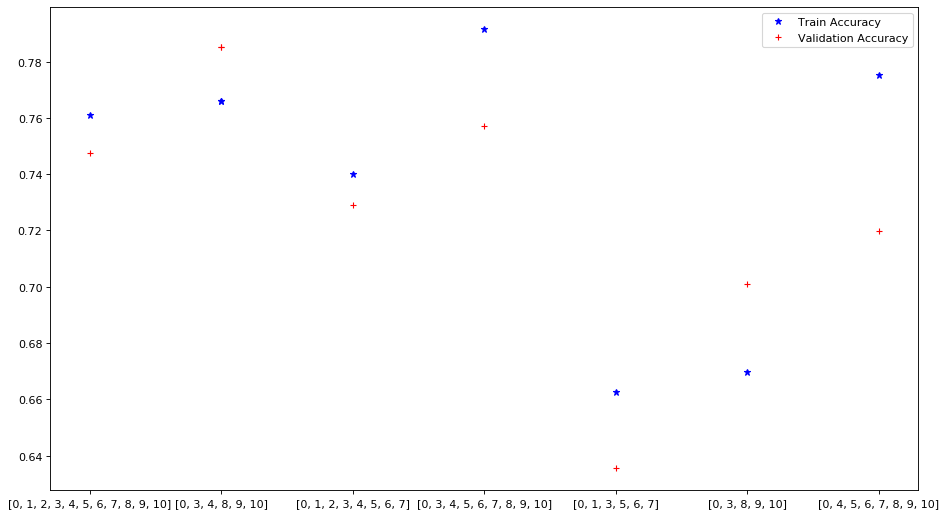

In [42]:
combinaciones_str = [str(comb) for comb in combinaciones]
plt.plot(combinaciones_str, Naive_Bayes_Result.AccuracyTrain, 'b*',
         combinaciones_str, Naive_Bayes_Result.AccuracyVal, 'r+');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [43]:
Filtro_Tit = [0,4,5,6,7,8,9,10]
mNB_final = Naive_Bayes(X_train_cv, y_train_cv, Filtro_Tit)

(mt.accuracy_score(y_train, mNB_final.predict(X_train[:, Filtro_Tit])), 
mt.accuracy_score(y_val, mNB_final.predict(X_val[:, Filtro_Tit])), 
mt.accuracy_score(y_train_cv, mNB_final.predict(X_train_cv[:, Filtro_Tit])))

(0.8032786885245902, 0.7663551401869159, 0.795880149812734)

In [44]:
def Features_prob(pdDataFrame, featureName, x, qsize):
    f, bins_f = pd.qcut(pdDataFrame[featureName], qsize, retbins=True, duplicates='drop')
    rango = pd.cut(x, bins = bins_f)

    if rango.isnull().any():
        return 0, bins_f
    return (f.value_counts()[rango] / len(f)).values, bins_f

def Lab_Prob(pdDataFrame, featureName, x, className, label, bins_f):
    f = pd.cut(pdDataFrame.loc[pdDataFrame[className] == label , featureName], 
               bins = bins_f, include_lowest=True)
    rango = pd.cut(x, bins = bins_f, include_lowest=True)
    
    if rango.isnull().any():
        return np.zeros(len(x))
    
    return (f.value_counts()[rango] / len(f)).values

def Lb_Probab(pdDataFrame, className, label):
    p = pdDataFrame.loc[pdDataFrame[className] == label, className].count() / len(pdDataFrame)
    return p

def Lab_Prob_seg(pdDataFrame, featureName, x, className, label):
    pClass = pdDataFrame.loc[(pdDataFrame[className] == label), featureName].count()
    pInt = pdDataFrame.loc[(pdDataFrame[className] == label)&(pdDataFrame[featureName] == 1), featureName].count()
    
    pLabel = pInt/pClass
    pNotLabel = 1. - pLabel
    prob = np.array([pNotLabel, pLabel])
    return prob[x.astype(int)]

def Pred_Tit(Titanic, TitanicEval):
    age = TitanicEval.Age.values
    fare = TitanicEval.Fare.values
    _, binsAge = Features_prob(Titanic, "Age", age, 5)
    _, binsFare = Features_prob(Titanic, "Fare", fare, 5)
    
    BinaryFields = ["Female"]
    
    survived_list = [0,1]
    Surv_p1 = []
    for survived in survived_list:
        Ft1 = Lab_Prob(Titanic, "Age", age, "Survived", survived, binsAge)
        Ft2 = Lab_Prob(Titanic, "Fare", fare, "Survived", survived, binsFare)
        ones_ft = np.ones(len(TitanicEval.values))
        for binaryFeature in BinaryFields:
            ones_ft = Lab_Prob_seg(Titanic, binaryFeature, 
                                                TitanicEval[binaryFeature].values, 
                                                "Survived", survived)
        Surv = Lb_Probab(Titanic, "Survived", survived)
        Surv_p1.append( (Ft1 * Ft2 * ones_ft) * Surv )

    Surv_p1 = np.array(Surv_p1)
    Surv_p1_yes = Surv_p1[1,:] / np.sum(Surv_p1, axis=0)
    return np.array([p > 0.5 for p in Surv_p1_yes]).astype(np.float)

In [45]:
Field_Train = ["Age", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]
Titanic_train = pd.DataFrame(np.column_stack(
    (X_train[:, NB_freq_varFilter], y_train)), columns=Field_Train)

In [46]:
yhat_NBmanual_train = Pred_Tit(Titanic_train, Titanic_train)
yhat_NBmanual_train

mt.accuracy_score(y_train, yhat_NBmanual_train)

0.7962529274004684

In [47]:
Field_Ev = ["Age", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]
 
Titanic_val = pd.DataFrame(X_val[:, NB_freq_varFilter], columns=Field_Ev)

In [48]:
# Obtener los valores dados por el NB frecuentista
yhat_NBmanual_val = Pred_Tit(Titanic_train, Titanic_val)
yhat_NBmanual_val

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [50]:
def Arbol_Ent(X, y, max_depth): 
    tree_model = tree.DecisionTreeClassifier(max_depth = max_depth)
    tree_model.fit(X, y)
    return tree_model

Arbol_Ent(X_train, y_train, 2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
Met_Lis_New = []
Met_List = []
depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for depth in depth_list: 
    tree_model = Arbol_Ent(X_train, y_train, depth)
    Metrica_Ent, valMetrics = Metricas_Acq(tree_model, X_train, y_train, X_val, y_val)
    Met_Lis_New.append(Metrica_Ent.copy())
    Met_List.append(valMetrics.copy())

In [52]:
Result_Arbol = pd.DataFrame(np.column_stack((depth_list, np.array(Met_Lis_New), np.array(Met_List))), 
                             columns = ['Profundidad', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
Result_Arbol

,Profundidad,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,2.0,0.782201,0.693069,0.729167,0.782201,0.813084,0.750000,0.789474,0.813084
1,3.0,0.826698,0.735714,0.851240,0.826698,0.813084,0.729730,0.843750,0.813084
2,4.0,0.838407,0.747253,0.894737,0.838407,0.813084,0.729730,0.843750,0.813084
3,5.0,0.868852,0.813333,0.865248,0.868852,0.822430,0.765432,0.794872,0.822430
4,6.0,0.882904,0.835526,0.875862,0.882904,0.831776,0.780488,0.800000,0.831776
5,7.0,0.896956,0.848276,0.938931,0.896956,0.831776,0.763158,0.852941,0.831776
6,8.0,0.908665,0.863158,0.976190,0.908665,0.869159,0.810811,0.937500,0.869159
7,9.0,0.932084,0.901024,0.985075,0.932084,0.850467,0.789474,0.882353,0.850467
8,10.0,0.948478,0.927152,0.979021,0.948478,0.831776,0.769231,0.833333,0.831776
9,11.0,0.957845,0.940000,1.000000,0.957845,0.831776,0.775000,0.815789,0.831776


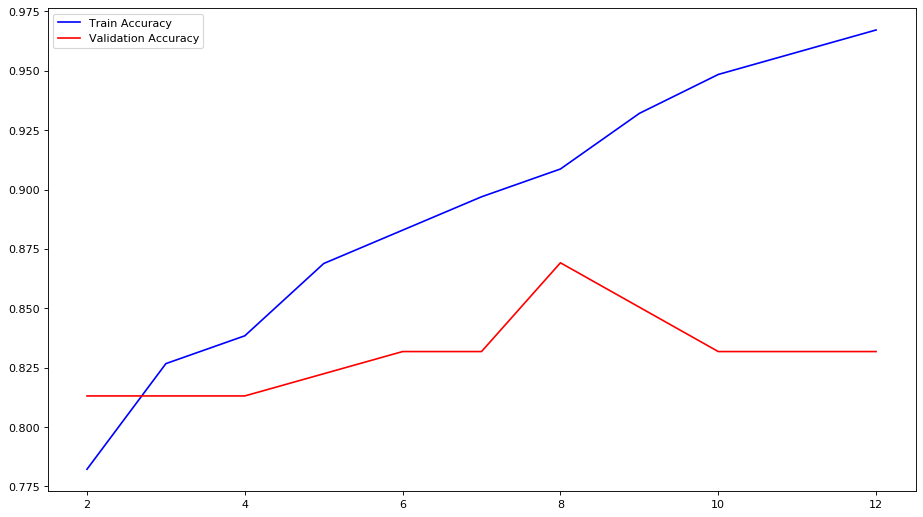

In [53]:
plt.plot(Result_Arbol.Profundidad, Result_Arbol.AccuracyTrain, 'b-',
         Result_Arbol.Profundidad, Result_Arbol.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [54]:
Arbol_Fin = Arbol_Ent(X_train_cv, y_train_cv, max_depth = 7)

(mt.accuracy_score(y_train, Arbol_Fin.predict(X_train)), 
mt.accuracy_score(y_val, Arbol_Fin.predict(X_val)), 
mt.accuracy_score(y_train_cv, Arbol_Fin.predict(X_train_cv)))

(0.892271662763466, 0.9065420560747663, 0.8951310861423221)

In [55]:
import graphviz
dot_data = tree.export_graphviz(Arbol_Fin, out_file=None, feature_names=Data_Titanic[Campos].columns.values, class_names=Data_Titanic["passenger_survived"].value_counts().index.values,filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("Imagen/Arbol")

'Imagen\\Arbol.png'

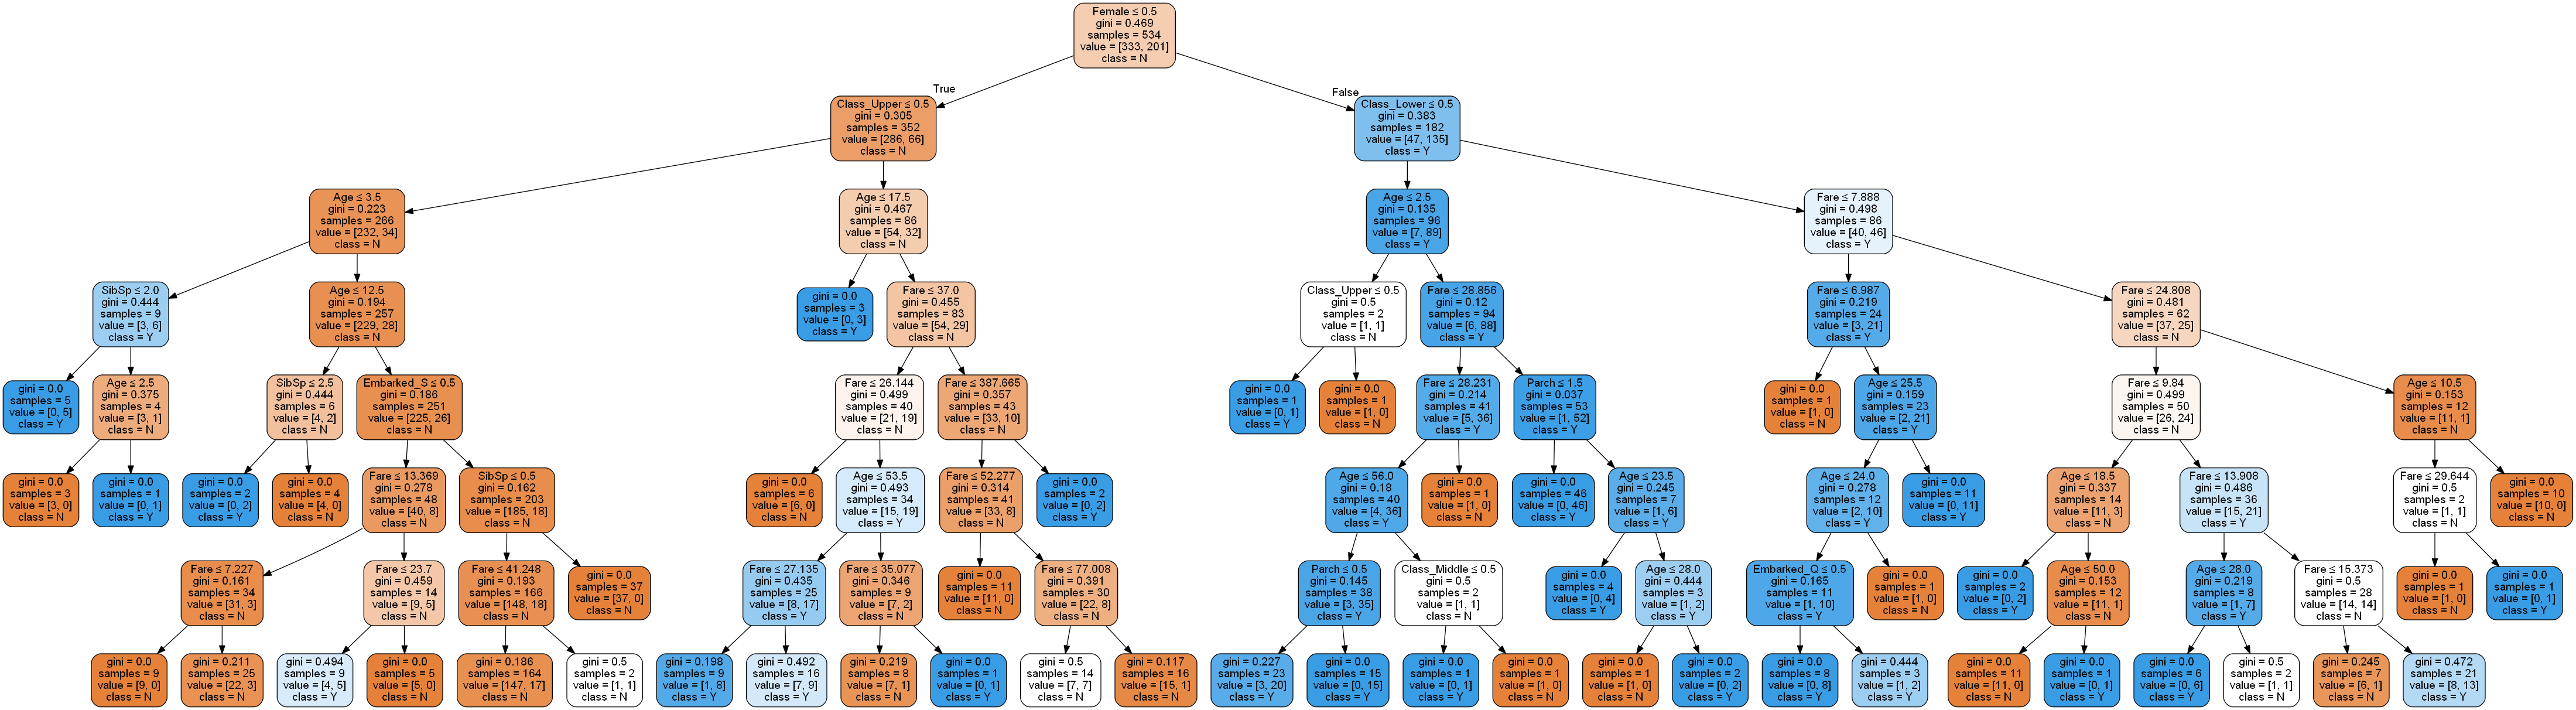

In [56]:
from IPython.display import Image
Image("Imagen/Arbol.png")

# Conclusiones

Podemos obtener diversa data según los modelos que utilicemos. Por ejemplo con el modelo Naive Bayes podemos concluir que los mejores resultados del modelo son cuando utilizamos las variables de Age y Female. Tamibén que al computar las métricas del modelo obtenemos valores por encima del 75% lo cual nos dá evidencia sólida para poder elegir sobre los camos que estuvimos trabajando en donde también se encuentran "Age", "Female", "Class_Middle", etc..

Con regresión logística podemos observar que las métricas de evaluación no son tan buenas en comparación de otros métodos vistos en clase, pero eliminando clases este mejora considerablemente para lambdas iguales a 6. 

SVM y árboles fueron los más fáciles de implementar a mi consideración y que el paquete de SciKit-Learn tenga cargadas varias opciones para árboles facilita bastante el trabajo. 

                            # Mayor dificultad

Al momento de implementar el gridsearch ya que no se tenía completamente bien el concepto y creo que pude haber utilizado diferentes validaciones en lugar de las enseñadas en clase. 

El ensemble final que se esperaba tener listo no pude realizarlo, pero considero que el accuracy pudo ser mayor al 85% por el resto de muestras que se pudieron obtener de los diversos métodos.


                            # Consideraciones 
                            
Considero que era un proyecto bastante amplio y largo como para realizarlo todo aún con la consideración de tenerlo desde el primer día de clases. Entiendo perfectamente que se pudo ir implementando después del primer mes, pero en dado caso hubiera sido mejor que fuera un proyecto en tríos para que se lograse culminar completo y se pudiese dividir la carga de trabajo. Al final si desde el primer día se pudiese realizar un proyecto de este calibre no existiría la necesidad de tomar un curso. 

